In [7]:
import os
from glob import glob

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data_path = glob('dataset/mnist_png/training/0/*.png')
data_path[0]

'dataset/mnist_png/training/0/16585.png'

In [13]:
path = data_path[0]
path

'dataset/mnist_png/training/0/16585.png'

In [15]:
data_path = tf.io.matching_files('dataset/mnist_png/training/*/*.png')
data_path[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'dataset/mnist_png/training/0/1.png'>

In [16]:
path = data_path[0]
path

<tf.Tensor: shape=(), dtype=string, numpy=b'dataset/mnist_png/training/0/1.png'>

In [17]:
gfile = tf.io.read_file(path)

In [18]:
image = tf.io.decode_image(gfile)

In [20]:
image.shape

TensorShape([28, 28, 1])

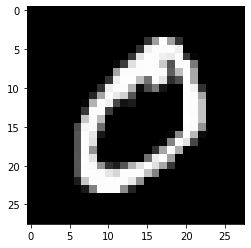

In [22]:
plt.imshow(image[:, :, 0], 'gray')
plt.show()

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True
)

In [31]:
image.shape

TensorShape([28, 28, 1])

In [32]:
inputs = image[tf.newaxis, ...]
inputs.shape

TensorShape([1, 28, 28, 1])

In [36]:
image = next(iter(datagen.flow(inputs)))
image.shape

(1, 28, 28, 1)

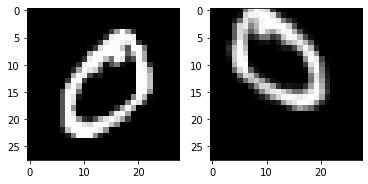

In [40]:
plt.subplot(121)
plt.imshow(inputs[0, :, :, 0], 'gray')
#plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.imshow(image[0, :, :, 0], 'gray')
#plt.imshow(np.squeeze(inputs), 'gray')
plt.show()

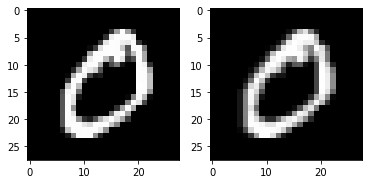

In [50]:
datagen = ImageDataGenerator(
            width_shift_range=0.3
)

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.imshow(inputs[0, :, :, 0], 'gray')

plt.subplot(122)
plt.imshow(outputs[0, :, :, 0], 'gray')
plt.show()

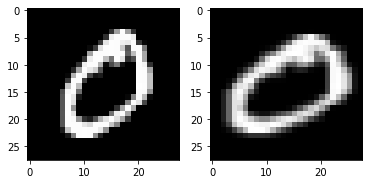

In [62]:
datagen = ImageDataGenerator(
            zoom_range=0.3
)

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.imshow(inputs[0, :, :, 0], 'gray')

plt.subplot(122)
plt.imshow(outputs[0, :, :, 0], 'gray')
plt.show()

In [64]:
#rescale (normalization이라서 train test 둘다 해야함)
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.
)

test_datagen = ImageDataGenerator(
    rescale=1./255.
)